# **Ajuste por mínimos cuadrados con el Método de Descenso por el Gradiente**

# **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [8]:
# 1)
import numpy as np
import matplotlib.pyplot as plt


# **Ejercicio 2) Caso de ajuste lineal**

# **Objetivo**

Comprender y aplicar el método de descenso por el gradiente para ajustar una recta $y = \theta_0 + \theta_1 x$ a un conjunto de datos ruidosos.

# **Actividades**

**2.1)  Planteo del problema**

1.   Escriba el modelo lineal con dos parámetros: $\hat{y}_i = \theta_0 +
\theta_1 x_i$.
2.   Explique qué representan $\theta_0$ y $\theta_1$.
3.   Genere un conjunto de datos simulados con ruido a partir de una recta conocida.

**2.2)  Función de costo**

1.   Defina la función de costo de mínimos cuadrados $J(\theta_0, \theta_1)$:

$$
J(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^n \left( \hat{y}_i - y_i \right)^2
$$

2.   Explique por qué se utiliza el cuadrado de los errores y el factor $\tfrac{1}{2n}$.
3.   Grafique los datos simulados y la recta inicial con parámetros arbitrarios (por ejemplo, $\theta_0 = 0, \theta_1 = 0$).

**2.3)  Derivación de gradientes**

1.   Calcule las derivadas parciales de $J$ respecto de $\theta_0$ y $\theta_1$:
    \begin{align}
    \frac{\partial J}{\partial \theta_0} =& \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i),\\
    \frac{\partial J}{\partial \theta_1} =& \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)x_i
    \end{align}
2.  Interprete geométricamente qué significa el gradiente en este contexto.

**2.4) Algoritmo de descenso por gradiente**

1.   Escriba las reglas de actualización:
    \begin{align}
    \theta_0 \leftarrow &\theta_0 - \alpha \frac{\partial J}{\partial \theta_0}, \\
    \theta_1 \leftarrow &\theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
    \end{align}

2.   Explique el rol de la tasa de aprendizaje $\alpha$.
3.   Discuta qué ocurre si $\alpha$ es demasiado grande o demasiado pequeña.

**2.5) Implementación en Python**

1.   Implemente el cálculo de la función de costo.
2.   Implemente el bucle de descenso por gradiente.
3.   Guarde en una lista la evolución de $J$ en cada iteración.
4.   Muestre los parámetros finales obtenidos.

**2.6) Visualización de resultados**

1.   Grafique la evolución de la función de costo en función de las iteraciones.
2.   Grafique los datos ruidosos y la recta ajustada final.

**2.7) Análisis y discusión**

1.   Compare los parámetros obtenidos con los valores reales usados para generar los datos.
2.   Reflexione sobre la convergencia: ¿cuántas iteraciones fueron necesarias?
3.   Analice la distribución de los residuos: ¿parecen ruido gaussiano?

**2.8) Extensión opcional**

Probar diferentes valores de $\alpha$ y comparar resultados.

theta0 =  5.877754767029774
theta1 =  3.006227978944683


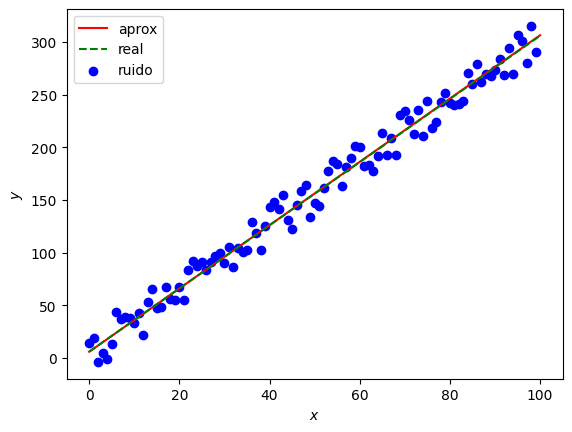

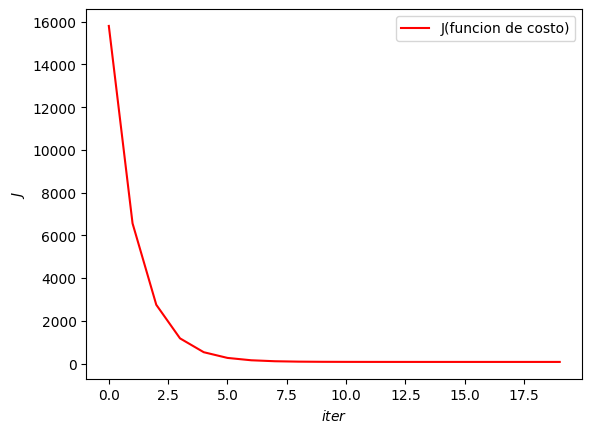

In [9]:
# 2.1
#supongamos una recta 3x+2
n = 100
p = [0.0,0.0]

noisy_values = []
for i in range (0,n):
    real_value = 3*i+6
    noisy_value = real_value + np.random.uniform(-20,20)
    noisy_values.append(noisy_value)


alfa = 0.0005
J_list = []
for j in range(10000):
    pder0 = 0
    pder1 = 0
    J = 0
    for x_i in range(n):
        y_i = noisy_values[x_i]
        y_hat = p[0] + p[1]*x_i
        error = y_hat - y_i
        pder0 += error
        pder1 += error * x_i
        J += error**2

    pder0 /= n
    pder1 /= n
    J /= 2*n
    J_list.append(J)
    #print(J)
    # Actualizar parámetros

    p[0] = p[0] - alfa * pder0
    p[1] = p[1] - alfa * pder1

x = np.linspace(0,n)
y = p[0] + p[1]*x

print("theta0 = ", p[0])
print("theta1 = ", p[1])

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x,y,label="aprox",linestyle='-',c='red')
plt.plot(x,3 * x + 6, label = "real",linestyle= '--',c='green')
plt.scatter(range(n),noisy_values,label="ruido",c='blue')
plt.legend()
plt.show()


plt.xlabel('$iter$')
plt.ylabel('$J$')
plt.plot(range(20),J_list[:20],label="J(funcion de costo)",linestyle='-',c='red')
plt.legend()
plt.show()


# **Ejercicio 3) Caso de ajuste con una función senoidal**

# **Objetivo**

Comprender y aplicar el método de descenso por el gradiente para ajustar una función seno de la forma:

$$
\hat{y}(x) = A \, \sin(fx + \phi)
$$

a un conjunto de datos ruidosos.

# **Actividades**

**3.1) Planteo del problema**

1.   Escriba el modelo senoidal con tres parámetros: amplitud $A$, frecuencia $f$ y fase $\phi$.
2.   Explique qué representa cada parámetro en términos geométricos y físicos.
3.   Genere un conjunto de datos simulados a partir de una función seno conocida y añada ruido gaussiano.

**3.2) Función de costo**

1. Defina la función de costo de mínimos cuadrados:
    $$
    J(A, f, \phi) = \frac{1}{2n} \sum_{i=1}^n \left( ( A \, \sin(fx_{i} + \phi) ) - y_i \right)
    $$
2.  Grafique los datos simulados junto con una curva inicial con parámetros arbitrarios.

**3.3) Derivación de gradientes**
1. Calcule las derivadas parciales de $J$ respecto de cada parámetro:
    
    \begin{align}
    \frac{\partial J}{\partial A} = &\frac{1}{n} \sum_{i=1}^n \left( ( A \, \sin(fx_{i} + \phi) ) - y_i \right)\,(\sin(fx_{i} + \phi))\\
    \frac{\partial J}{\partial f} = &\frac{1}{n} \sum_{i=1}^n \left( ( A \, \sin(fx_{i} + \phi) ) - y_i \right)\,( A \,x_{i}\,\cos(fx_{i} + \phi))\\
    \frac{\partial J}{\partial \phi} = &\frac{1}{n} \sum_{i=1}^n \left( ( A \, \sin(fx_{i} + \phi) ) - y_i \right)\,( A \,\cos(fx_{i} + \phi))\\
    \end{align}
2. Interprete geométricamente qué significa el gradiente en este contexto.

**3.4) Algoritmo de descenso por gradiente**

1. Escriba las reglas de actualización:
   \begin{align}
    A \leftarrow &A - \alpha \frac{\partial J}{\partial A}\\
    f \leftarrow &f - \alpha \frac{\partial J}{\partial f}\\
    \phi \leftarrow & \phi - \alpha \frac{\partial J}{\partial \phi}
   \end{align}

**3.5) Implementación en Python**

1. Implemente la función de costo.
2. Implemente el cálculo de los gradientes.
3. Programe el bucle de descenso por gradiente para actualizar $A, f, \phi$.
4. Guarde en una lista la evolución de $J$ en cada iteración.
5. Muestre los parámetros finales obtenidos.

**3.6) Visualización de resultados**

1. Grafique la evolución de la función de costo en función de las iteraciones.
2. Grafique los datos ruidosos y la curva senoidal ajustada final.

**3.7) Análisis y discusión**

1. Compare los parámetros obtenidos con los valores reales usados para generar los datos.
2. Reflexione sobre la convergencia: ¿cuántas iteraciones fueron necesarias?
3. Analice la distribución de los residuos: ¿parecen ruido gaussiano?

**3.8) Extensión opcional**

Probar diferentes valores de $\alpha$ y comparar resultados.


A =  1.829430069251136
f =  1.4329797647132287
phi =  3.259447251269138


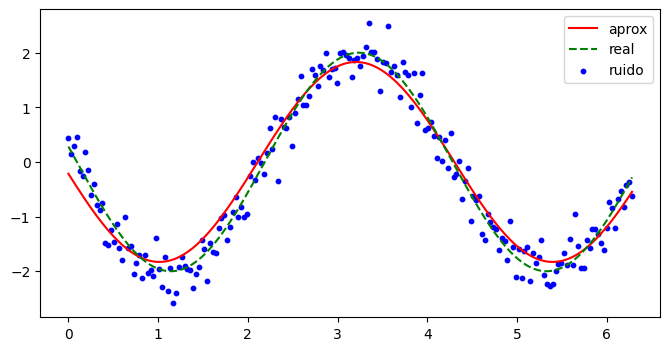

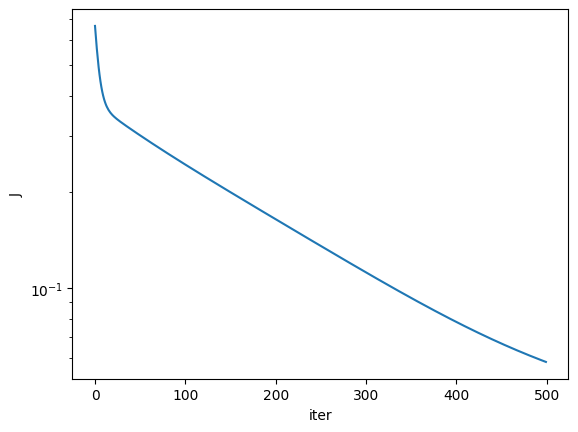

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 200
p = [1,1,4]  # A, f, phi
x = np.linspace(0,2*np.pi,n)

real_A = 2
real_f = 1.5
real_phi = 3

noise = np.random.normal(0,0.3,size = n)
real_values = real_A * np.sin(real_f * x + real_phi)
noisy_values = real_values + noise

alfa = 0.01
J_list = []
for j in range(500):
    pder0 = pder1 = pder2 = 0.0
    J = 0.0
    
    y_i = noisy_values
    sin_value  = np.sin(p[1]*x + p[2])
    cos_value = np.cos(p[1]*x + p[2])
    y_hat = p[0] * sin_value
    error = y_hat - y_i
    pder0 = np.sum(error * sin_value)/n
    pder1 = np.sum(error * (p[0] * x * cos_value))/n
    pder2 = np.sum(error * (p[0] * cos_value))/n

    J = (1/(2*n)) * np.sum(error**2)
    J_list.append(J)

    p[0] -= alfa * pder0
    p[1] -= alfa * pder1
    p[2] -= alfa * pder2

#x = np.arange(n)              # <-- importante: misma malla
y = p[0] * np.sin(p[1]*x + p[2])

print("A = ", p[0])
print("f = ", p[1])
print("phi = ", p[2])

plt.figure(figsize=(8,4))
plt.plot(x, y, label="aprox", linestyle='-', c='red')
plt.plot(x, real_values, label="real", linestyle='--', c='green')
plt.scatter(x, noisy_values, label="ruido", c='blue', s=10)
plt.legend(); plt.show()

plt.figure()
plt.plot(J_list)
plt.yscale('log')   # opcional
plt.xlabel('iter'); plt.ylabel('J'); plt.show()
